In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

In [7]:
import os.path
def path_base(base_name):
    current_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
    print(current_dir)
    data_dir = current_dir.replace('notebook','data')
    print(data_dir)
    data_base = data_dir + '\\' + base_name
    print(data_base)
    return data_base

In [8]:
base = pd.read_csv(path_base('db_cartaocredito_clientes.csv'), header = 1)

C:\MyPhyton\DataScience\notebook
C:\MyPhyton\DataScience\data
C:\MyPhyton\DataScience\data\db_cartaocredito_clientes.csv


In [9]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']

In [10]:
X = base.iloc[:,[1,25]].values
scaler = StandardScaler()
X = scaler.fit_transform(X)



Text(0, 0.5, 'WCSS')

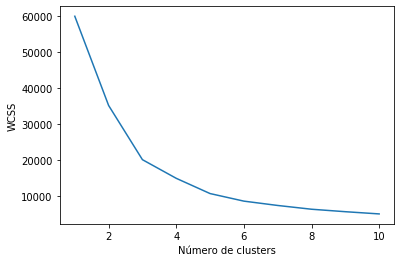

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')



In [6]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
previsoes = kmeans.fit_predict(X)

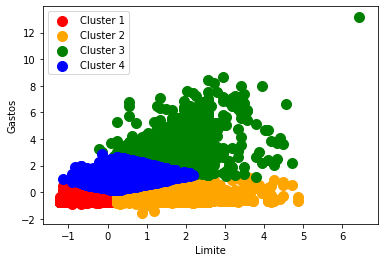

In [7]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s = 100, c = 'blue', label = 'Cluster 4')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend()



In [8]:
lista_clientes = np.column_stack((base, previsoes))
lista_clientes = lista_clientes[lista_clientes[:,26].argsort()]

In [9]:
lista_clientes

array([[     1,  20000,      2, ...,      1,   7704,      0],
       [ 16776, 120000,      1, ...,      0,  13311,      0],
       [ 16775,  20000,      1, ...,      0, 110522,      0],
       ...,
       [ 17301, 110000,      2, ...,      0, 516377,      3],
       [  1695,  80000,      2, ...,      1, 516777,      3],
       [  4541, 180000,      2, ...,      0, 835665,      3]], dtype=int64)